In [2]:
import os
import shutil  # <- 이걸 사용한다. (쉐 명령어를 사용하기 위해서)

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
# Original Data Path
original_dataset_dir = './datasets/train'

# 이미지를 3등분한다.
# Small Dataset Path
base_dir = './datasets/cats_and_dogs_small' # datasets의 위치에 경로를 하나 만들어 준다.

if os.path.exists(base_dir):  # 해당되는 경로가 있는가 없는가를 체크한다. 만약 해당되는 경로가 있으면 지운다.
    shutil.rmtree(base_dir) # 해당되는 경로를 삭제해준다.
os.mkdir(base_dir) # 해당되는 경로의 디렉토리를 만들어 준다.

* 6개의 폴더를 추가로 만들어준다.
* Train data, Validation data, Test data

In [9]:
# Train, Validation, Test data

# 학습용 경로를 만든다.
train_dir = os.path.join(base_dir, 'train') # base_dir 경로 뒤에 tarin이라는 폴더를 생성한다.
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

* 필요한 경로 6개를 설정해준다.
* 이미지를 처리 할때, 경로를 지정해준다.

## file copy

In [15]:
# file copy

# 배열을 하나 만든다.
# fnames = [] # 파이썬에서의 리스트 객체가 된다.

# for i in range(1000): # for문은 0부터 999까지 반복을 한다.
#     filename = 'cat.{}.jpg'.format(i)
#     fnames.append(filename) # 반복할때 마다 리스트 객체를 넣어준다.
    
# print(fnames)

# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) # 원본 경로를 잡은 것이다.
    dst = os.path.join(train_cats_dir, fname) # 대상 경로(학습을 시킬 cat경로이다.)
    shutil.copyfile(src, dst) # 원본 경로에서 대상 경로로 카피를 하라.

# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)
    
# 학습용 데이터 1000개씩 확보를 한 것이다.
print('---------------------------- Test dataset copy completed')

In [16]:
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst) 
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)
print('---------------------------- Validation dataset copy completed')

---------------------------- Validation dataset copy completed


In [17]:
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) 
    
# dog test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)
print('---------------------------- Test dataset copy completed')

---------------------------- Test dataset copy completed


In [20]:
print('Train cat images: ', len(os.listdir(train_cats_dir))) # os.listdir 지정되는 경로 안에 파일의 개수를 알 수 있다. 그럼 전체 파일의 목록이 나온다.
print('Train dog images: ', len(os.listdir(train_dogs_dir)))

print('Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Validation dog images: ', len(os.listdir(validation_dogs_dir)))

print('Test cat images: ', len(os.listdir(test_cats_dir)))
print('Test dog images: ', len(os.listdir(test_dogs_dir)))

Train cat images:  1000
Train dog images:  1000
Validation cat images:  500
Validation dog images:  500
Test cat images:  500
Test dog images:  500


In [21]:
# Build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # 이진분류 문제가 되었다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

1) 데이터를 전처리 해줄 필요가 있고
2) 데이터를 늘려줄 필요가 있다.

## Data Preprocessing

In [45]:
# Data Preprocdssing (이미지의 스케일을 조절해준다.)

# Image Scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 턴서로 바꾸어주는 역할을 한다.
train_datagen =  ImageDataGenerator(rescale = 1./255) # 스케일을 재조정해준다.
# test_datagen = ImageDataGenerator(rescale = 1./255)  # 비율로서 조정을 한다.
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(               # 타깃 디렉토리를 지정해주어야 한다.
                                        train_dir,
                                        target_size = (150, 150),
                                        batch_size = 20,
                                        class_mode = 'binary') # 둘중하나를 지정하는 거라서 binary라고 해준다.

# test_generator = test_datagen.flow_from_directory(
#                                         test_dir,
#                                         target_size = (150, 150),
#                                         batch_size = 20,
#                                         class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size = (150, 150),
                                        batch_size = 20,
                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('Batch Data Size: ', data_batch.shape)
    print('Batch Label Size: ', labels_batch.shape)
    break

Batch Data Size:  (20, 150, 150, 3)
Batch Label Size:  (20,)


In [29]:
history = model.fit_generator( # 여기서는 fit_generator를 사용해준다.
    train_generator,
    steps_per_epoch = 100, # 이미지를 읽어들여서 처리하는 단위이다. 100개 단위로 끊어서 처리를 한다.
    epochs = 30, # 총 반복 횟수를 30번을 가진다.
    # validation_data = test_generator, # validation_generator를 아직 안 만들어서 test_generator를 사용한다.
    validation_data = validation_generator # 나중에 이렇게 바꾸어준다.
    validation_steps = 50 # 50개 단위로 검증을 한다.
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 52s 519ms/step - loss: 0.7938 - accuracy: 0.5280 - val_loss: 0.9480 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 48s 482ms/step - loss: 0.6894 - accuracy: 0.5865 - val_loss: 0.6759 - val_accuracy: 0.5680
Epoch 3/30
100/100 [==============================] - 48s 483ms/step - loss: 0.6539 - accuracy: 0.6550 - val_loss: 0.6462 - val_accuracy: 0.6370
Epoch 4/30
100/100 [==============================] - 50s 495ms/step - loss: 0.5998 - accuracy: 0.6880 - val_loss: 0.5986 - val_accuracy: 0.6730
Epoch 5/30
100/100 [==============================] - 50s 500ms/step - loss: 0.5572 - accuracy: 0.7255 - val_loss: 0.5980 - val_accuracy: 0.6850
Epoch 6/30
100/100 [==============================] - 50s 504ms/step - loss: 0.5092 - accuracy: 0.7505 - val_loss: 0.6474 - val_accuracy: 0.6690
Epoch 7/30
100/100 [==============================] - 

In [30]:
model.save('cats_and_dogs_small_1.0.h5') # 이렇게 저장해서 사용해준다.

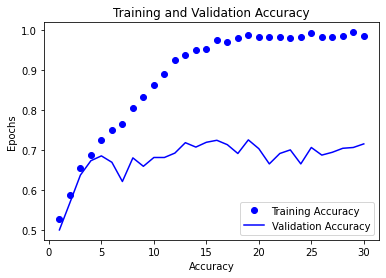

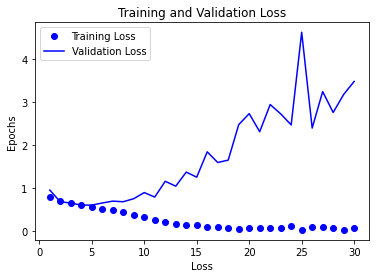

In [34]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1) # 전체 결과의 횟수만큼 에포크를 그린다.

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation Accuracy')
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure() # 새로운 그림판을 만든다.
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Training and Validation Loss")
plt.legend()

In [35]:
# 데이터 증식을 위한 셋팅을 해둔다.

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2, # 20%이내에서 좌우로 이동시켜 본다.
    height_shift_range = 0.2, # 20%이내에서 상하로 이동시켜 본다.
    shear_range = 0.2, # 이미지의 기울기를 기울여 본다.
    zoom_range = 0.2,
    horizontal_flip = True, # 좌우반전 속성을 쓸건지 
    fill_mode = 'nearest') # 빈칸을 어느걸로 채울지 <- (근처에 있는 값으로 채운다.)

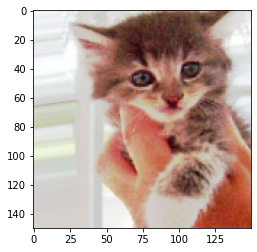

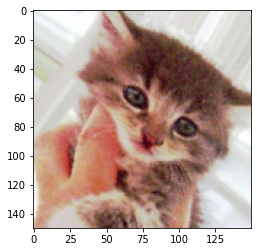

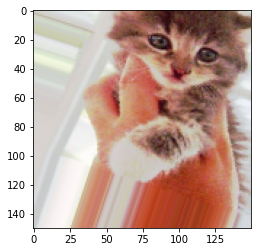

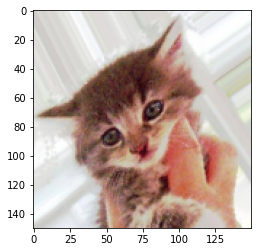

In [44]:
from tensorflow.keras.preprocessing import image  # 이미지를 볼 때, 사용해준다.

# os.listdir를 사용해서 파일네임으로 가져온다. 그래서 fname에 집어넣는다.
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]) # 정렬을 해주기 위해 이렇게 해준다.
# os.path.join(train_cats_dir, fname) fname이 들어와서 실제 경로를 만들어준다.

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150)) # 이미지의 path를 주면 읽어 들인다.

x = image.img_to_array(img) # 이미지의 x 좌표가 나온다.
x = x.reshape((1,) + x.shape)

i = 0 # 시작 값은 0으로 한다.
for batch in datagen.flow(x, batch_size = 1):  # 한개당 한번씩 돈다. / datagen에 의해서 사진이 증식이 된다.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [55]:
# 테스트나 Validation은 증식을 시키면 안된다.

train_datagen = ImageDataGenerator(rescale=1./255,    
                                   rotation_range=40,    
                                   width_shift_range=0.2,    
                                   height_shift_range=0.2,    
                                   shear_range=0.2,    
                                   zoom_range=0.2,    
                                   horizontal_flip=True,)
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # 타깃 디렉터리        
    train_dir,        
    # 모든 이미지를 150 × 150 크기로 바꿉니다        
    target_size=(150, 150),        
    batch_size=32,        
    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다        
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,        
                                                        target_size=(150, 150),        
                                                        batch_size=32, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator,      
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
5/5 [==============================] - 14s 3s/step - loss: 0.5063 - accuracy: 0.7406 - val_loss: 0.4287 - val_accuracy: 0.8020
Epoch 2/100
5/5 [==============================] - 15s 3s/step - loss: 0.5511 - accuracy: 0.7109 - val_loss: 0.4316 - val_accuracy: 0.7990
Epoch 3/100
5/5 [==============================] - 15s 3s/step - loss: 0.4889 - accuracy: 0.7688 - val_loss: 0.4251 - val_accuracy: 0.8050
Epoch 4/100
5/5 [==============================] - 15s 3s/step - loss: 0.5409 - accuracy: 0.7188 - val_loss: 0.4670 - val_accuracy: 0.7970
Epoch 5/100
5/5 [==============================] - 15s 3s/step - loss: 0.5059 - accuracy: 0.7500 - val_loss: 0.4564 - val_accuracy: 0.7790
Epoch 6/100
5/5 [==============================] - 15s 3s/step - loss: 0.5010 - accuracy: 0.7531 - val_loss: 0.4291 - val_accuracy: 0.8130
Epoch 7/100
5/5 [==============================] - 14s 3s/step - loss: 0.4539 - ac

KeyboardInterrupt: 